In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pathlib import Path
import pickle as pkl

In [2]:
embeddings_path = Path("../embeddings.pkl")

In [3]:
with embeddings_path.open("rb") as handle:
    d = pkl.load(handle)

In [4]:
embeddings = d["final_embeddings"]

In [5]:
pca = PCA(n_components=2)
data = pca.fit_transform(embeddings)

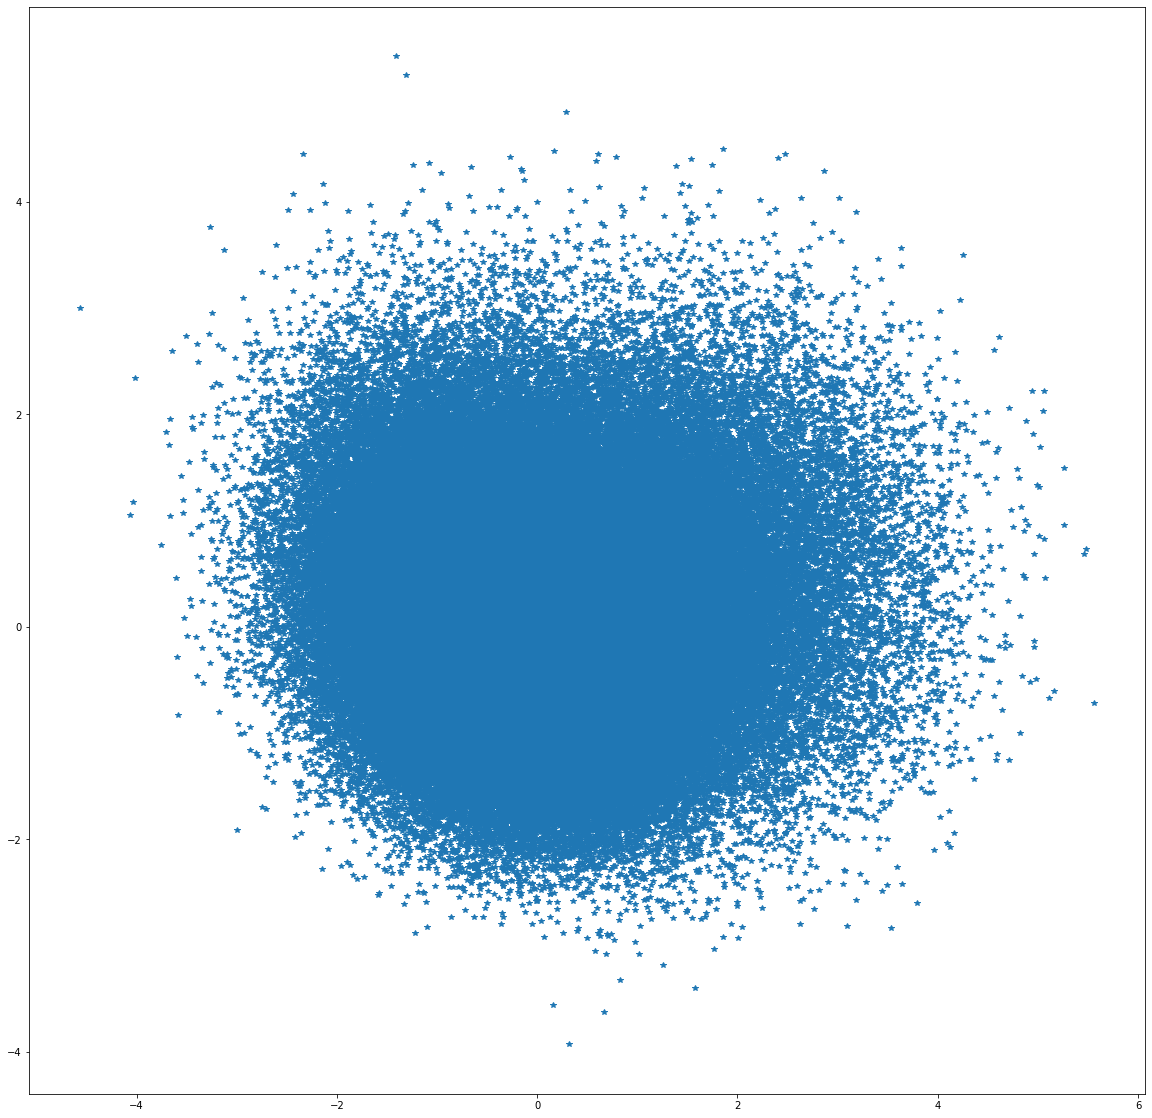

In [6]:
plt.figure(figsize=(20, 20))
plt.plot(data[:, 0], data[:, 1], '*')
plt.savefig("./pca_clusters.jpg")
plt.show()


In [34]:
tsne = TSNE(n_components=2, n_jobs=4)
data_tsne = tsne.fit_transform(embeddings)

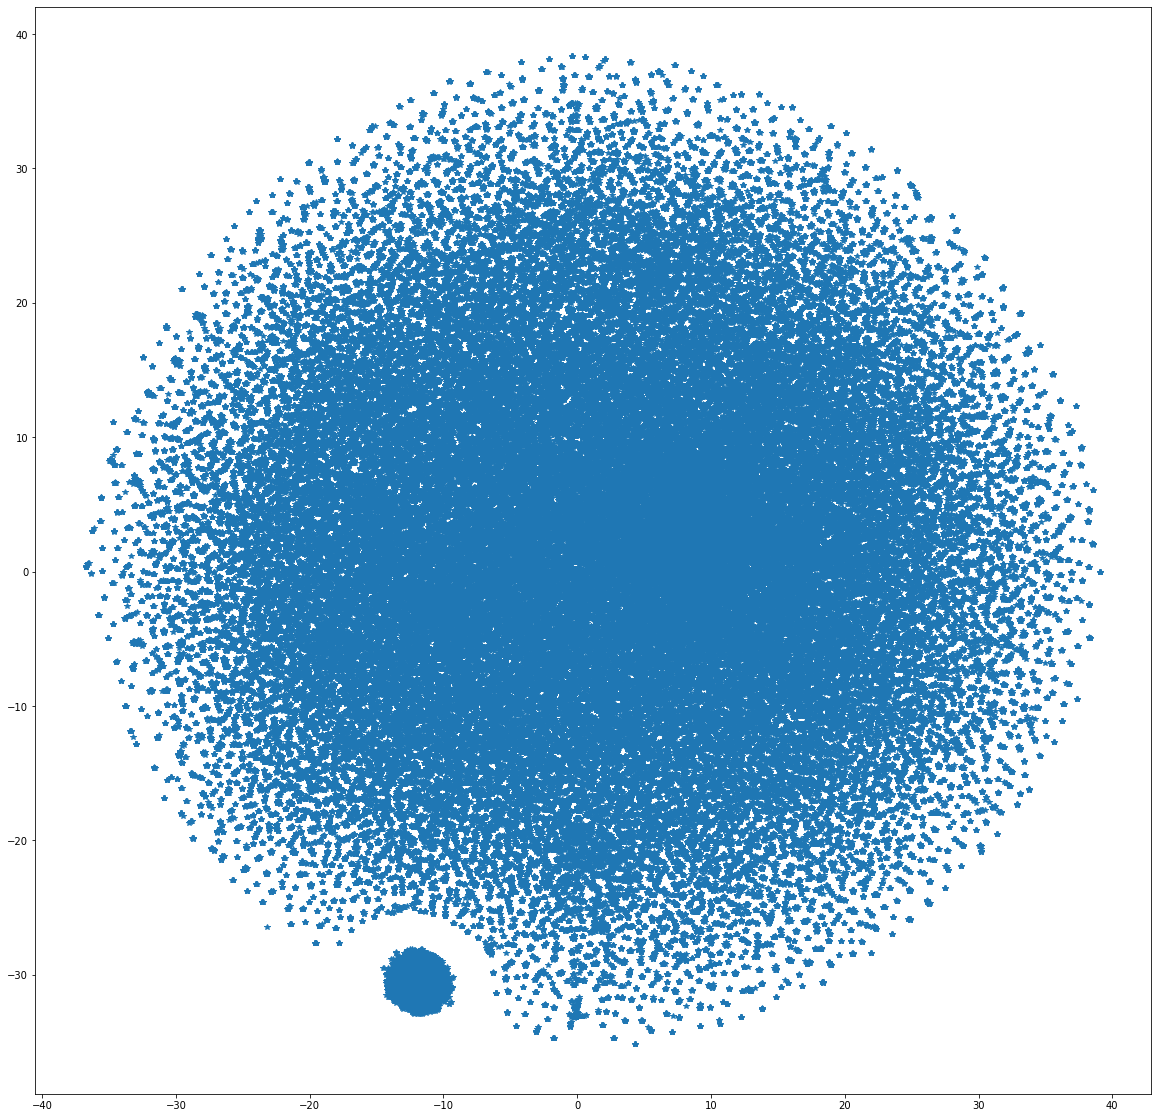

In [36]:
plt.figure(figsize=(20, 20))
plt.plot(data_tsne[:, 0], data_tsne[:, 1], '*')
plt.show()

In [7]:
#with open("tsne_points.pkl", "wb") as handle:
#    pkl.dump(data_tsne, handle)


with open("tsne_points.pkl", "rb") as handle:
    data_tsne = pkl.load(handle)

In [8]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN().fit(embeddings)


In [9]:
clusters = dbscan.labels_

In [10]:
mask_1 = (clusters == -1)


In [11]:
l  = list(d["vocab"])

In [12]:
np.array(l)[mask_1]

array(['sec_490124', 'sec_425380', 'home_5', ...,
       'PT!059440045:45!120582347-1_81825!120582347-1_81825_16:42:00',
       'sec_422532', 'home_5225342'], dtype='<U69')

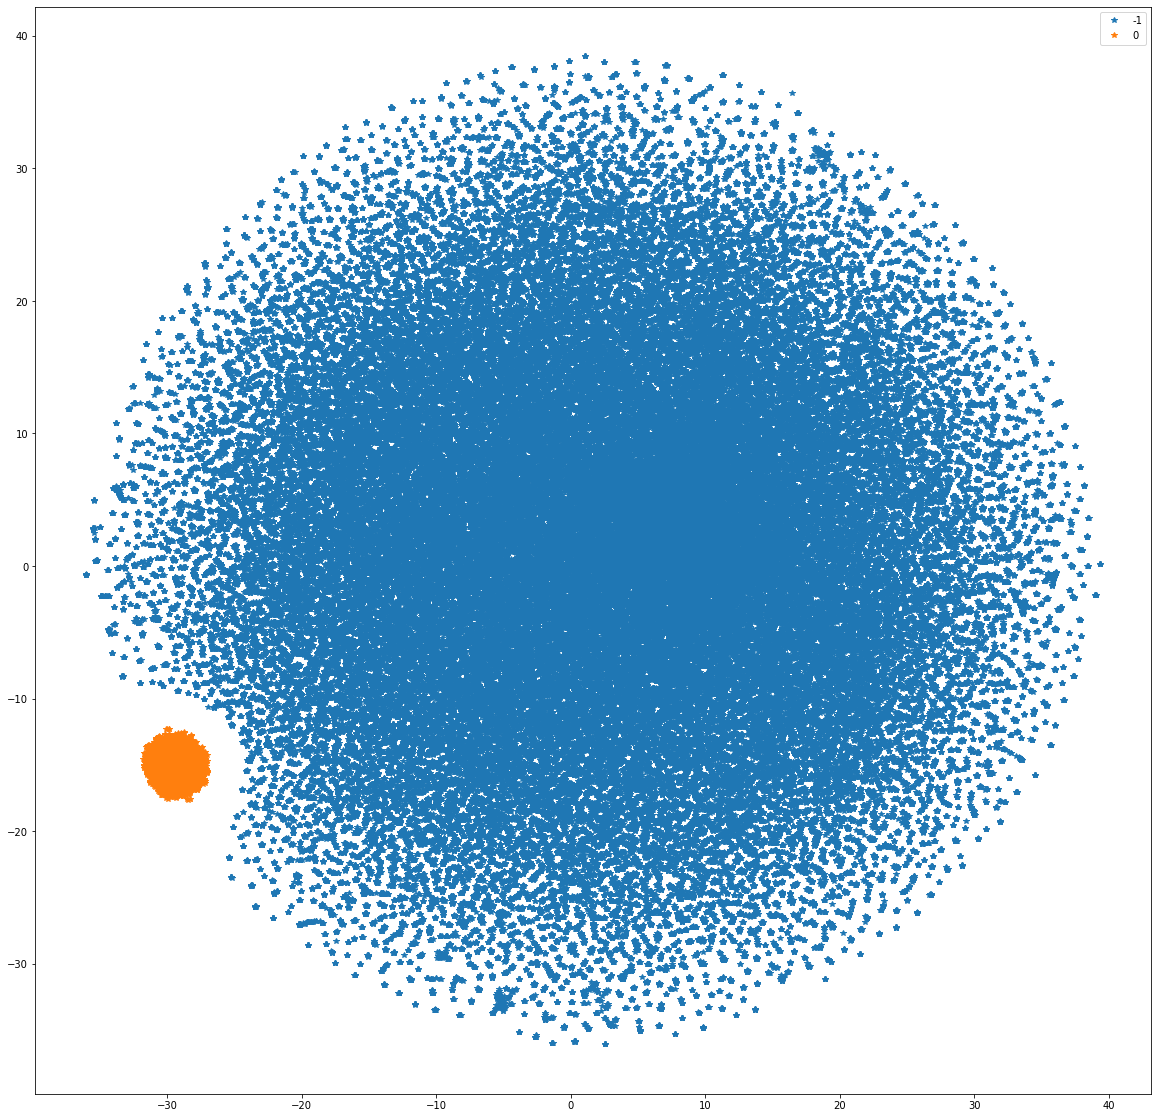

In [120]:
plt.figure(figsize=(20, 20))
for i in range(-1, 1):
    mask = (clusters == i)
    plt.plot(data_tsne[mask, 0], data_tsne[mask, 1], '*', label=f"{i}")
plt.legend()
plt.savefig("./cluster_dbscan.jpg")
plt.show()

In [31]:
gmm = GaussianMixture(n_components=100, verbose=1)
gmm.fit(data_tsne)

Initialization 0
Initialization converged: True


GaussianMixture(n_components=100, verbose=1)

In [32]:
data_tsne_c = gmm.predict(data_tsne)
data_tsne_c.shape

(211842,)

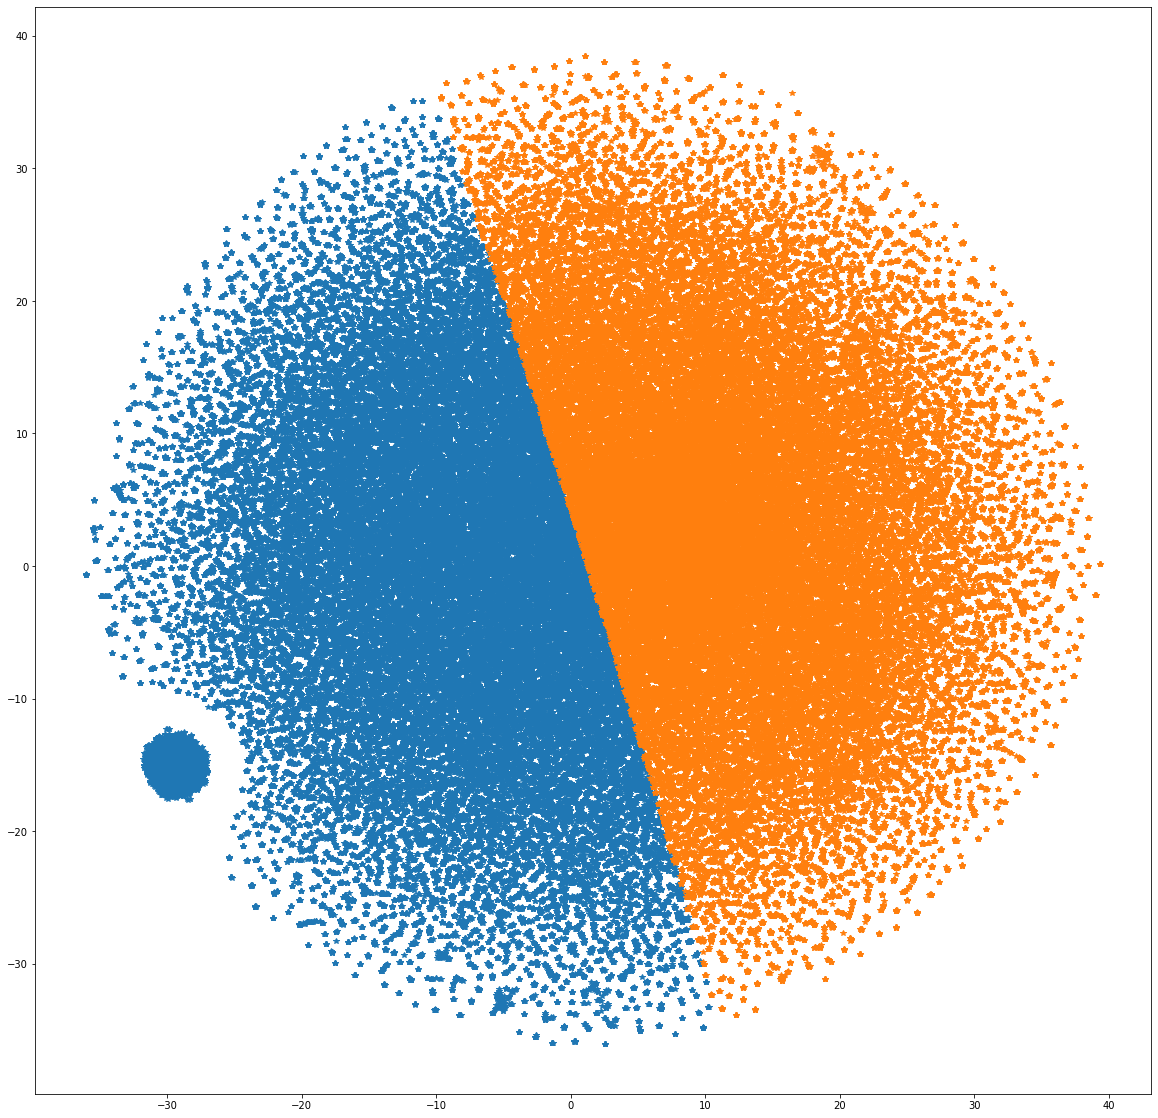

In [24]:
plt.figure(figsize=(20, 20))
for i in range(2):
    mask = data_tsne[data_tsne_c == i, :]
    plt.plot(mask[:, 0], mask[:, 1], '*')
plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans(n_clusters=2)

In [27]:
km.fit(data_tsne)

KMeans(n_clusters=2)

In [30]:
data_tsne_c = km.predict(data_tsne)
data_tsne_c

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

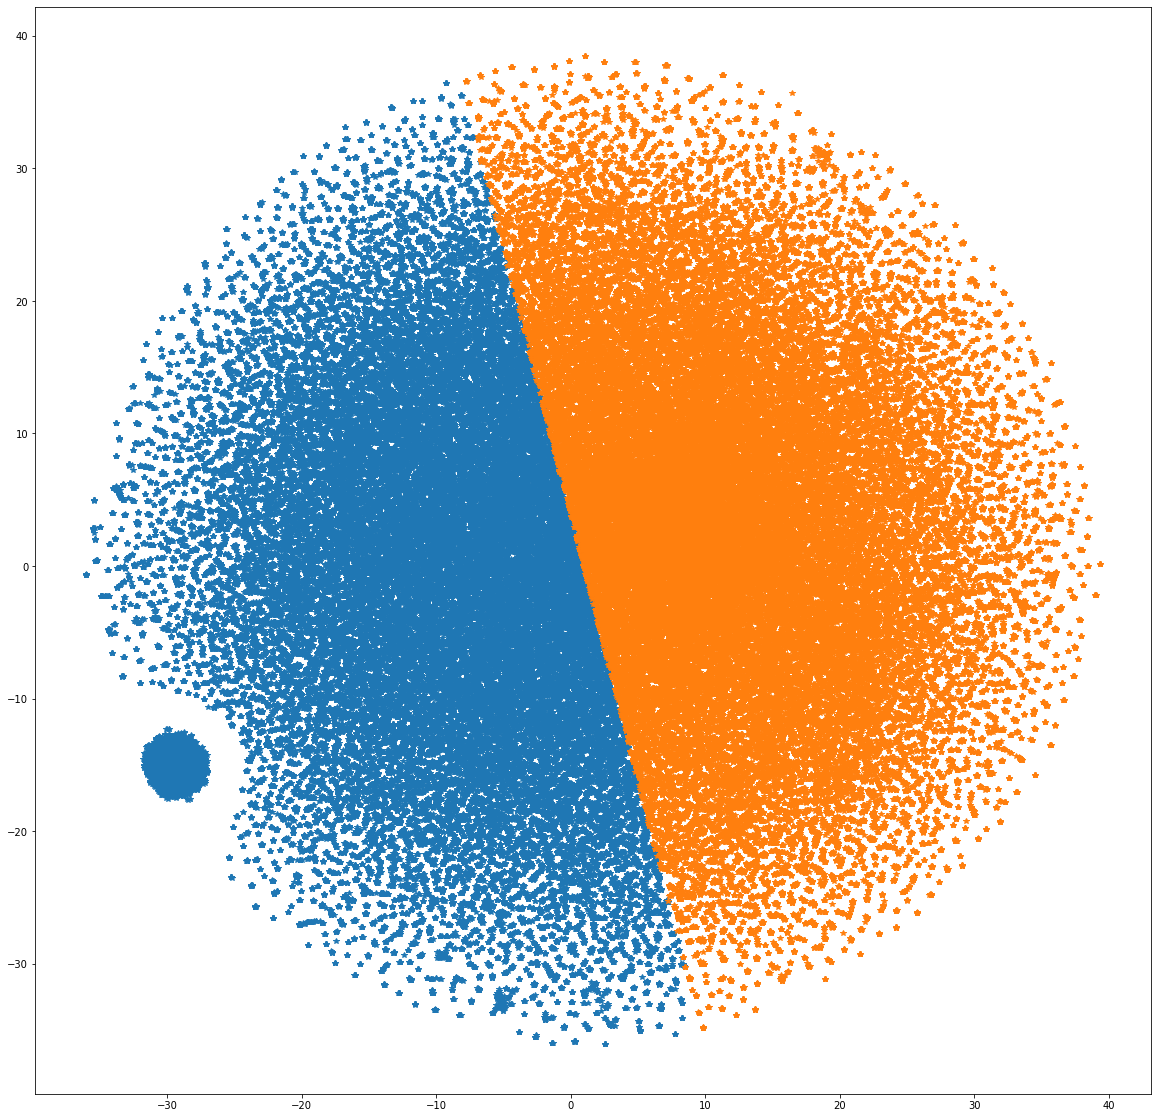

In [29]:
plt.figure(figsize=(20, 20))
for i in range(2):
    mask = data_tsne[data_tsne_c == i, :]
    plt.plot(mask[:, 0], mask[:, 1], '*')
plt.show()

In [35]:
data_tsne

array([[-12.472944 , -31.603613 ],
       [  9.226376 ,  10.761836 ],
       [  9.218809 ,  10.773367 ],
       ...,
       [  5.8628087,  19.435862 ],
       [  5.8530045,  19.434393 ],
       [  5.857564 ,  19.441317 ]], dtype=float32)

In [49]:
import pandas as pd

In [50]:
df = pd.read_csv("../simulation_data/v4/infectionEvents.txt", sep="\t")

In [51]:
df

,time,infector,infected,infectionType,date,groupSize,facility
0,284037.0,7861927,7874412,home_home,2020-01-26,8,home_3512319
1,284144.0,1099944,1099946,home_home,2020-01-26,3,home_584851
2,286922.0,7861927,8721391,home_home,2020-01-26,7,home_3512319
3,287593.0,1099944,1099943,home_home,2020-01-26,2,home_584851
4,289080.0,1099944,9489442,pt,2020-01-26,5,PT!100110008:8!120204114-1_201503!120204106-1_...
...,...,...,...,...,...,...,...
28243,1900799.0,11716186,11643434,leisure_leisure,2020-02-13,2,sec_228396
28244,1900799.0,459387,10084356,leisure_leisure,2020-02-13,2,sec_316322
28245,1900799.0,10274352,8231283,work_work,2020-02-13,2,work_374068
28246,1900799.0,6095093,3862422,home_home,2020-02-13,4,home_1824534


In [93]:
df.loc[df["infected"] == 11757462]

,time,infector,infected,infectionType,date,groupSize,facility


In [98]:

actions_df.loc[(actions_df["id"] == 7861927)]

,id,datetime,concept,duration,groupSize,contact
373396,7861927,114960.0,PT!100100146:146!119094471-1_259027!119094471-...,300,6,True
373397,7861927,115500.0,PT!100112011:T1!120223288-1_173509!120223286-1...,1980,1,False
373398,7861927,118151.0,edu_7932,31299,2,True
373399,7861927,150360.0,PT!100112011:T1!120222912-1_174161!120222912-1...,1020,2,True
373400,7861927,151740.0,PT!100100146:146!119094811-1_258785!119094811-...,1860,1,False


In [90]:
actions_df

,id,datetime,concept,duration,groupSize,contact
0,21,122385.0,sec_490124,2452,1,False
1,21,125232.0,sec_425380,1405,1,False
2,21,127214.0,home_5,12023,1,False
3,21,139380.0,PT!100110007:7!120200199-1_202458!120062097-1_...,480,2,True
4,21,140160.0,PT!100100180:180!120178341-1_235191!120178340-...,899,1,False
...,...,...,...,...,...,...
558855,11757462,148816.0,sec_422532,4287,1,False
558856,11757462,154860.0,PT!059440045:45!120582766-1_81480!120582367-1_...,840,2,True
558857,11757462,155999.0,sec_379487,0,1,False
558858,11757462,156300.0,PT!059440045:45!120582766-1_81480!120582399-1_...,300,2,True


In [17]:
actions_df = pd.read_csv("../simulation_data/v4/actions_1.csv")

## Create dataset for risk prediction

In [19]:
groups = actions_df.groupby("id")

In [37]:
from tqdm import tqdm

In [113]:
seqs_dataset = []
labels = []
persons = []

for person_id, group in tqdm(groups):
    sentence = []
    
    if infected.get(str(person_id), False):
        labels.append(1)
    else:
        labels.append(0)
            
    for row_num, row in group.iterrows():
        sentence.append(d["vocab"][row["concept"]])
    
    seqs_dataset.append(sentence)
        

100%|██████████| 108246/108246 [01:22<00:00, 1316.38it/s]


In [117]:
with open("./labels.pkl", "wb") as handle:
    pkl.dump(labels, handle)

In [116]:
len(labels), len(seqs_dataset)

(108246, 108246)

In [45]:
max_len = 0
for seq in seqs_dataset:
    if len(seq) > max_len:
        max_len = len(seq)

In [47]:
with open("./seqs_dataset.pkl", "wb") as handle:
    pkl.dump(seqs_dataset, handle)

In [52]:
with open("./infections.pkl", "rb") as handle:
    infections = pkl.load(handle)

In [111]:
infected = {}

for day in tqdm(infections[:45]):
    for person in day:
        infected[person[1]] = 1

100%|██████████| 45/45 [00:00<00:00, 1258.11it/s]


In [112]:
len(infected)

47545

In [5]:
from xml.etree import ElementTree as ET
from tqdm import tqdm

In [2]:
path = "../simulation_data/v4/events/day_001.xml"

In [3]:
tree = ET.parse(path)

In [11]:
person_id = 1099946

for event in tqdm(tree.getroot()):
    try:
        if event.attrib["person"] == str(person_id):
            print(event.attrib["person"], event.attrib["facility"])
    except:
        pass

 15%|█▌        | 349311/2314301 [00:00<00:04, 445103.15it/s]

1099944 home_584851


 21%|██▏       | 494985/2314301 [00:01<00:04, 426652.81it/s]

1099944 work_88109


 71%|███████▏  | 1654512/2314301 [00:03<00:00, 684101.92it/s]

1099944 work_88109


 78%|███████▊  | 1800621/2314301 [00:03<00:00, 634813.60it/s]

1099944 home_584851


100%|██████████| 2314301/2314301 [00:05<00:00, 418414.55it/s]


In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("../actions_1.csv")

In [26]:
for index, row in tqdm(df.iterrows()):
    if row["id"] == 7861927:
        print(row["concept"])


374380it [01:14, 5522.49it/s]

PT!100100146:146!119094471-1_259027!119094471-1_259027_07:20:00
PT!100112011:T1!120223288-1_173509!120223286-1_173507_08:00:00
edu_7932
PT!100112011:T1!120222912-1_174161!120222912-1_174161_17:14:00
PT!100100146:146!119094811-1_258785!119094811-1_258785_17:45:00


558860it [01:49, 5114.98it/s]


In [17]:
df.dtypes

id             int64
datetime     float64
concept       object
duration       int64
groupSize      int64
contact         bool
dtype: object